<a href="https://colab.research.google.com/github/estevaovukelic/Clusters/blob/main/Customer_Segmentation_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

- Data: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importing libraries

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [152]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Reading the data

In [153]:
creditcard_df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/cc_cluster.csv')

### Data Description

1.   CUSTID : Identification of Credit Card holder (Categorical)
2.   BALANCE : Balance amount left in their account to make purchases
3.   BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4.   PURCHASES : Amount of purchases made from account
5.   ONEOFFPURCHASES : Maximum purchase amount done in one-go
6.   INSTALLMENTSPURCHASES : Amount of purchase done in installment
7.   CASHADVANCE : Cash in advance given by the user
8.   PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9.   ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10.   PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11.   CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12.   CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13.   PURCHASESTRX : Numbe of purchase transactions made
14.   CREDITLIMIT : Limit of Credit Card for user
15.   PAYMENTS : Amount of Payment done by user
16.   MINIMUM_PAYMENTS : Minimum amount of payments made by user
17.   PRCFULLPAYMENT : Percent of full payment paid by user
18.   TENURE : Tenure of credit card service for user





### Dimensionality of the DataFrame.

In [154]:
creditcard_df.shape

(8950, 18)

### Reading the DataFrame.

In [155]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### DataFrame information

In [156]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Descriptive dataframe statistics

In [157]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Checking out: PURCHASES and CASH_ADVANCE

In [158]:
creditcard_df[creditcard_df['PURCHASES'] == 49039.570000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [159]:
creditcard_df['PURCHASES'].max()

49039.57

In [160]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [161]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

## Viewing and exploring data

### Viewing null data on the heatmap

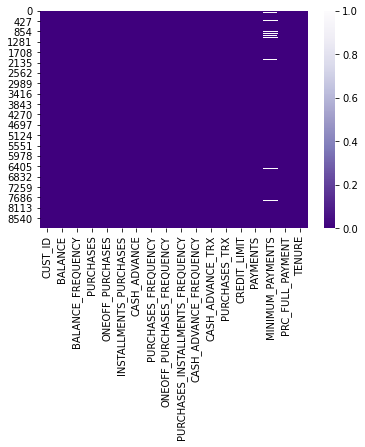

In [162]:
sns.heatmap(creditcard_df.isnull(),cmap='Purples_r');

### Counting the null data

In [163]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Column null data: CREDIT LIMIT and MINIMUM PAYMENTS, replaced by the respective averages

In [164]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [165]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [166]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [167]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

### Checking out

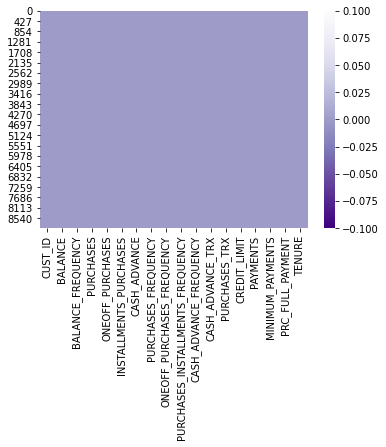

In [168]:
sns.heatmap(creditcard_df.isnull(),cmap='Purples_r');

In [169]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Checking duplicity

In [170]:
creditcard_df.duplicated().sum()

0

In [171]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [172]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [173]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [174]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

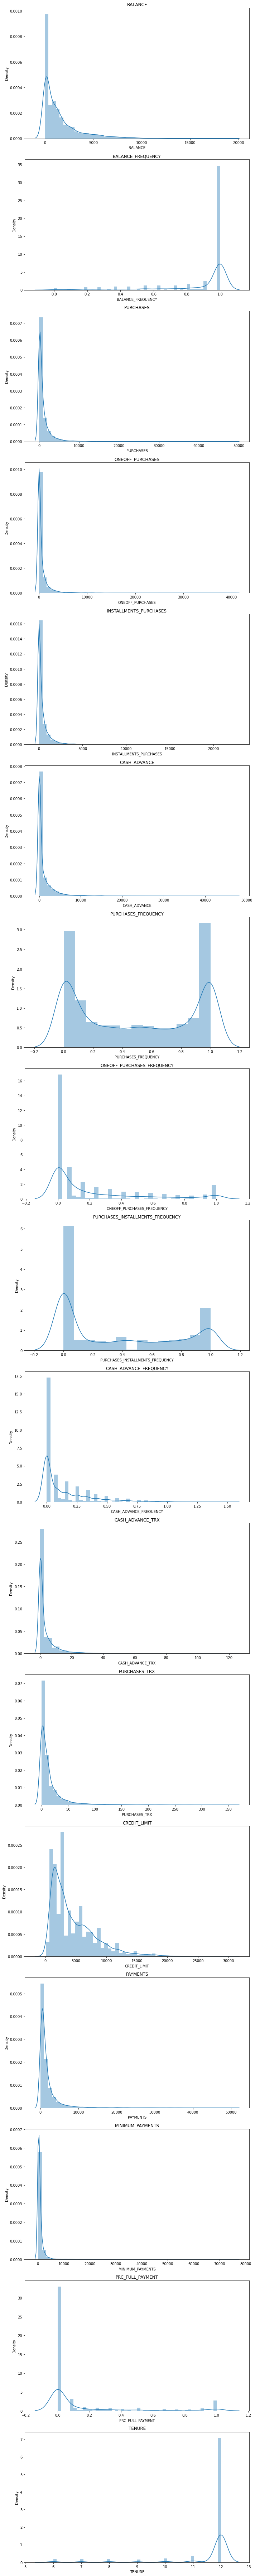

In [175]:
plt.figure(figsize=(10,100))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True);
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

### Correlation matrix

In [176]:
correlations = creditcard_df.corr()

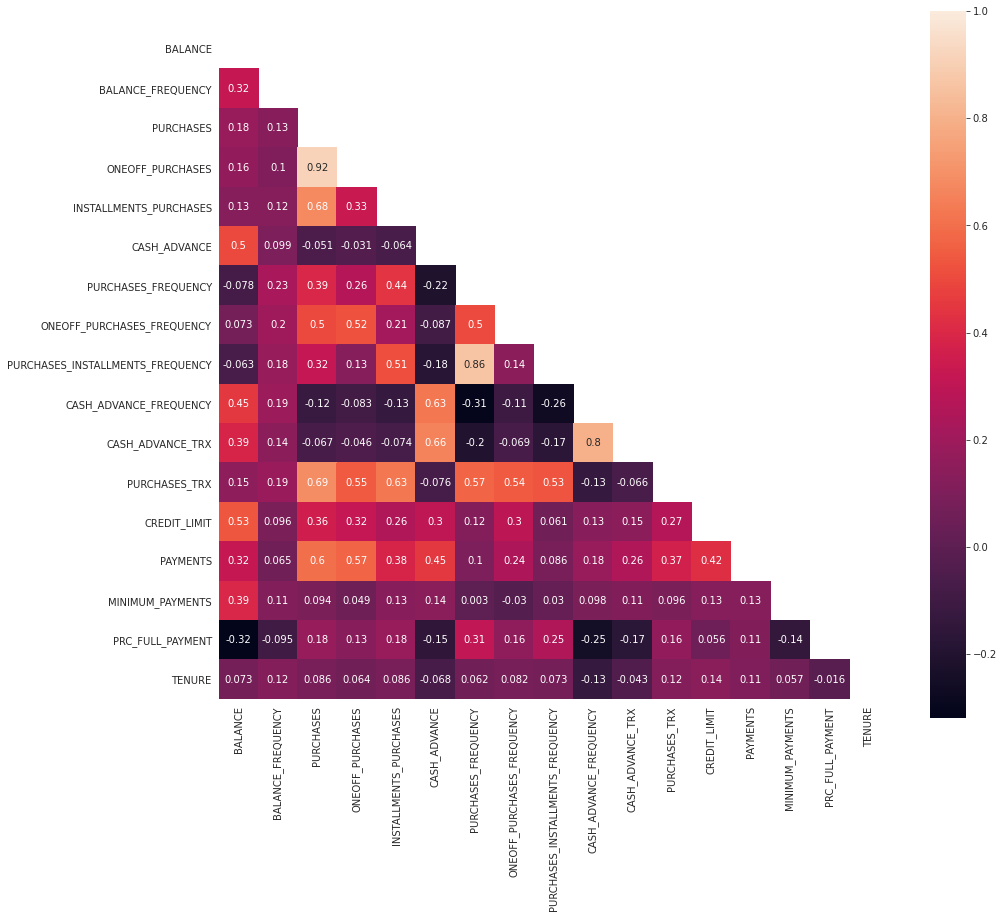

In [177]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 13))
    ax = sns.heatmap(correlations, mask=mask,annot=True,vmax=1, square=True)

## Defining the number of clusters using the Elbow Method

In [178]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

### Data standardization

In [179]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [180]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

### Checking data

In [181]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [182]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [183]:
wcss_1 = []
range_values = range(1, 25)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [184]:
print(wcss_1)

[152150.00000000003, 127785.04424596178, 111986.74707959316, 99073.93826774822, 91503.43545656833, 84851.39066365828, 79532.32854113287, 74624.61988709241, 69954.21289088146, 66466.45275400337, 63633.121663344624, 61363.210116891634, 59151.734950824095, 57499.031282899196, 55910.28389461512, 54653.699793530795, 53175.4649195354, 51960.106122481586, 50955.47313459506, 49814.264423891014, 48672.16386067929, 47804.3584034354, 46606.850070306384, 45781.389851071544]


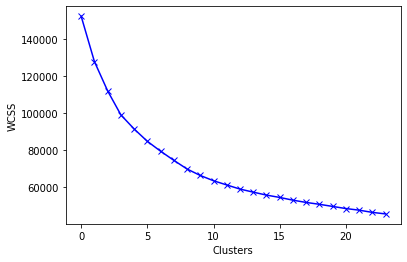

In [185]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

### Clusterings number = 8


## Grouping with k-means

In [186]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [187]:
labels, len(labels)

(array([1, 4, 0, ..., 6, 6, 6], dtype=int32), 8950)

In [188]:
ver = np.unique(labels, return_counts=True)
ver1 = pd.DataFrame(ver)
ver1

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,1108,2719,416,1179,863,2013,622,30


In [189]:
kmeans.cluster_centers_

array([[-1.63402194e-01,  3.91248358e-01,  4.73721379e-01,
         6.18352235e-01, -1.60626078e-02, -3.33105696e-01,
         9.42959724e-01,  1.87828914e+00,  8.95114431e-02,
        -4.07423228e-01, -3.23185774e-01,  5.31594560e-01,
         3.82607435e-01,  1.01508902e-01, -1.62530508e-01,
         4.14270071e-01,  2.62216356e-01],
       [ 1.82922965e-02,  4.03845248e-01, -3.61977347e-01,
        -2.47214094e-01, -4.01601874e-01, -9.03744810e-02,
        -8.66754865e-01, -4.09889018e-01, -7.58381033e-01,
         1.12001149e-01, -2.26653776e-02, -4.86904453e-01,
        -3.05745680e-01, -2.49582836e-01, -3.79934524e-03,
        -4.57045384e-01,  2.72736485e-01],
       [ 9.34901396e-01,  4.67049175e-01,  2.25295341e+00,
         1.70741162e+00,  2.19029680e+00, -1.92703826e-01,
         1.16075101e+00,  1.54809576e+00,  1.25722128e+00,
        -3.10074598e-01, -2.08712218e-01,  2.80059357e+00,
         1.23532371e+00,  1.28225922e+00,  5.75854157e-01,
         2.73318241e-01,  3.3

### Create dataframe for better understanding of cluster_centers

In [190]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.163402,0.391248,0.473721,0.618352,-0.016063,-0.333106,0.942960,1.878289,0.089511,-0.407423,-0.323186,0.531595,0.382607,0.101509,-0.162531,0.414270,0.262216
1,0.018292,0.403845,-0.361977,-0.247214,-0.401602,-0.090374,-0.866755,-0.409889,-0.758381,0.112001,-0.022665,-0.486904,-0.305746,-0.249583,-0.003799,-0.457045,0.272736
2,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
3,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062
4,1.690481,0.391576,-0.218284,-0.156544,-0.228597,2.029267,-0.478632,-0.213098,-0.415543,1.925902,1.940330,-0.267148,1.031162,0.825654,0.512697,-0.390593,0.068883
5,-0.366740,0.333338,-0.038539,-0.244303,0.357516,-0.363619,0.990253,-0.387060,1.205496,-0.475146,-0.361200,0.186769,-0.261316,-0.217940,-0.045979,0.314959,0.257484
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


### Reverse standardized cluster_centers for analysis

In [191]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1224.366953,0.969954,2015.317861,1618.775433,396.542428,280.332907,0.868806,0.762788,0.400011,0.053615,1.043321,27.923285,5886.531835,2027.002176,485.436049,0.274882,11.868231
1,1602.548699,0.972938,229.834652,182.112608,47.904053,789.351604,0.142480,0.080180,0.063037,0.157557,3.094152,2.607209,3382.021577,1010.625996,855.352328,0.020037,11.882310
2,3510.393168,0.987910,5816.674519,3426.390962,2391.725865,574.762188,0.956216,0.664285,0.864089,0.073095,1.824519,84.322115,8989.062500,5445.158665,2206.210364,0.233656,11.963942
3,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715
4,5083.068323,0.970031,536.838447,332.605956,204.350301,5234.339850,0.298252,0.138886,0.199290,0.520537,16.490151,8.069525,8246.239334,4123.330014,2059.024786,0.039473,11.609502
5,801.136827,0.956236,920.865753,186.944441,734.365067,216.346127,0.887787,0.086990,0.843532,0.040063,0.783905,19.352211,3543.676206,1102.229857,757.053521,0.245835,11.861898
6,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


- Group 0: average account balance (1224.36), high turnover, uses little credit from the card, volume of purchases (2015.31), payment of the complete credit card bill with an average of (0.27).

- Group 1: average account balance (1602.54), high turnover, uses little credit card, buys little (229.83), uses card advance (789.35), very low payments on full credit card bills (0.02).

- Group 2: good average balance on account (3510.39), high turnover (0.98), second largest volume of purchases between groups (5816.67), uses on average (574.76) the advance of the card, payments of complete credit card bills (0.23).

- Group 3: low account balance (104), low movement, pay little interest, withdraw little money from the card limit (302). 23% payment of the full credit card bill.

- Group 4: uses the credit card as a "loan", high current account balance (5083.06) and a lot of movementwith balance frequency (0,97), withdraws a lot of money from the cash advance (5234.33), low consumption (0.3) and the highest percentage among the groups in the use CASH ADVANCE FREQUENCY (0.52) . Very low percentage of cash payments of the PRC_FULL_PAYMENT (0.039)

 -Group 5: balance of (801.13), average group purchases of (920.86) and purchases frequency (0,88), between groups has the lowest average cash advance.

 -Group 6:it is the group with the shortest tenure of having an account with the average time (7.2), purchases, it uses a lot of cash advance and percentage of cash payment (0.15)

- Group 7: highest average account balance (5567.14), high card limit (15570), high consumption (0.91), payment of the invoice in a single installment has a higher percentage (0.47). Prime Client.

### Number of labels: the same as the dataframe

In [192]:
labels, len(labels)

(array([1, 4, 0, ..., 6, 6, 6], dtype=int32), 8950)

### Concatenate the labels (CLUSTER COLUMN) on the dataframe

In [193]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)

### Checking CLUSTER column (last column)

creditcard_df_cluster.head()

In [194]:
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Generate group histograms for better analysis

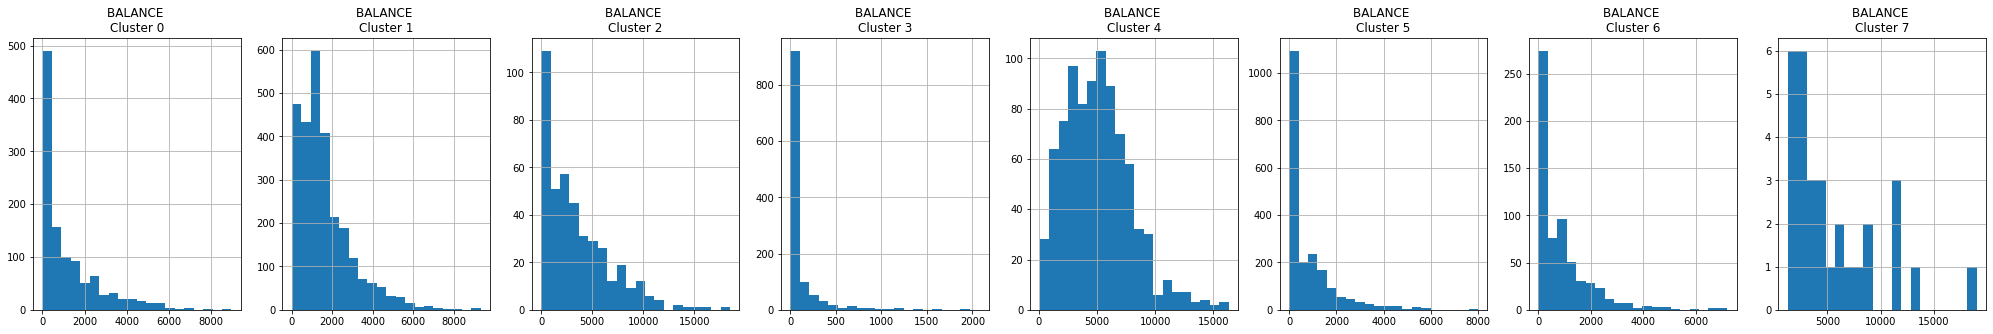

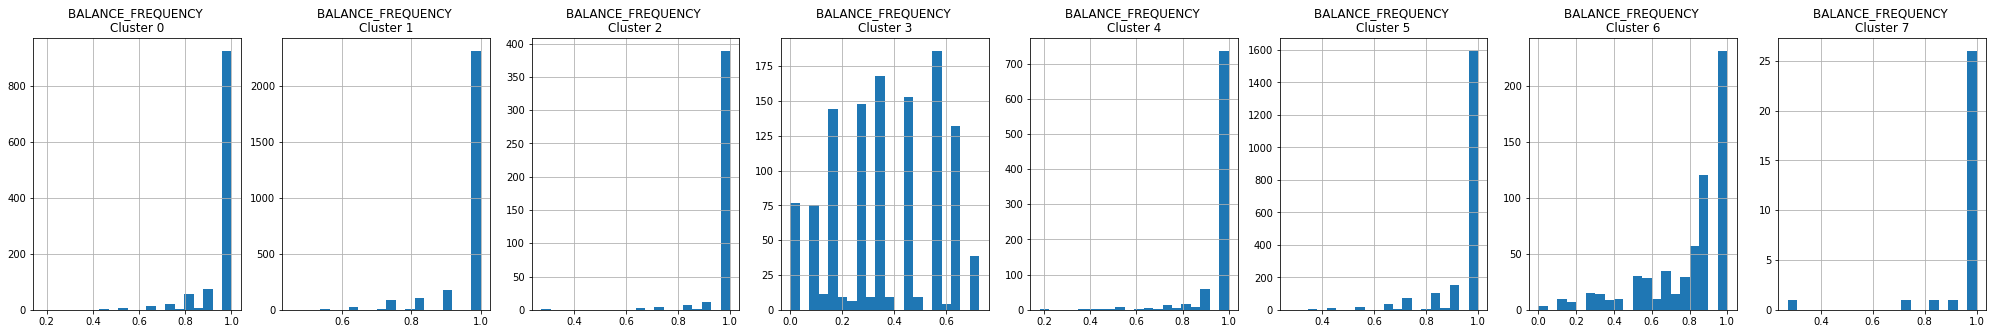

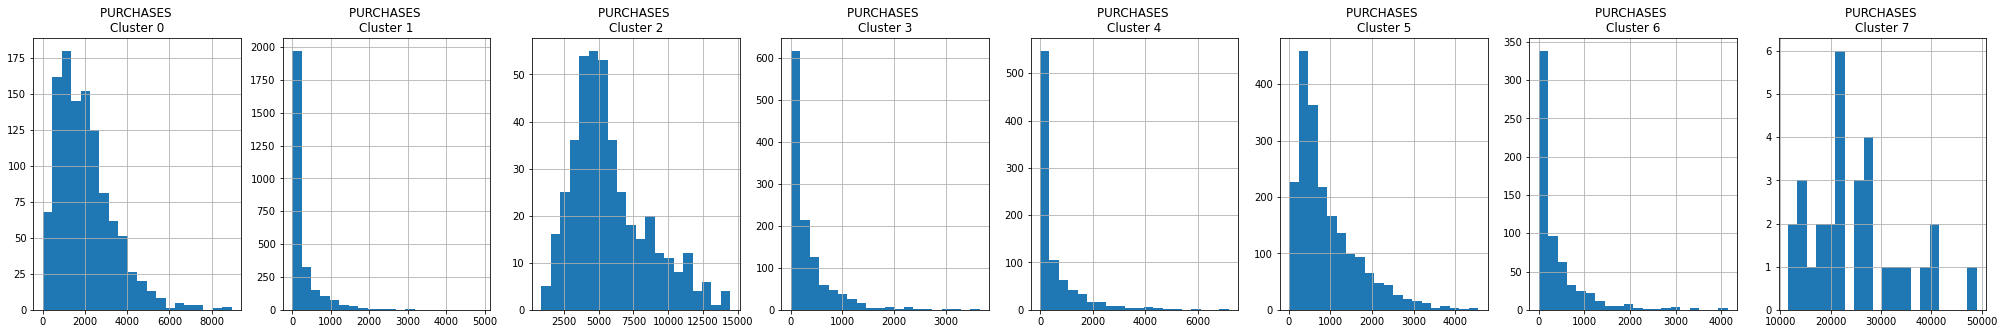

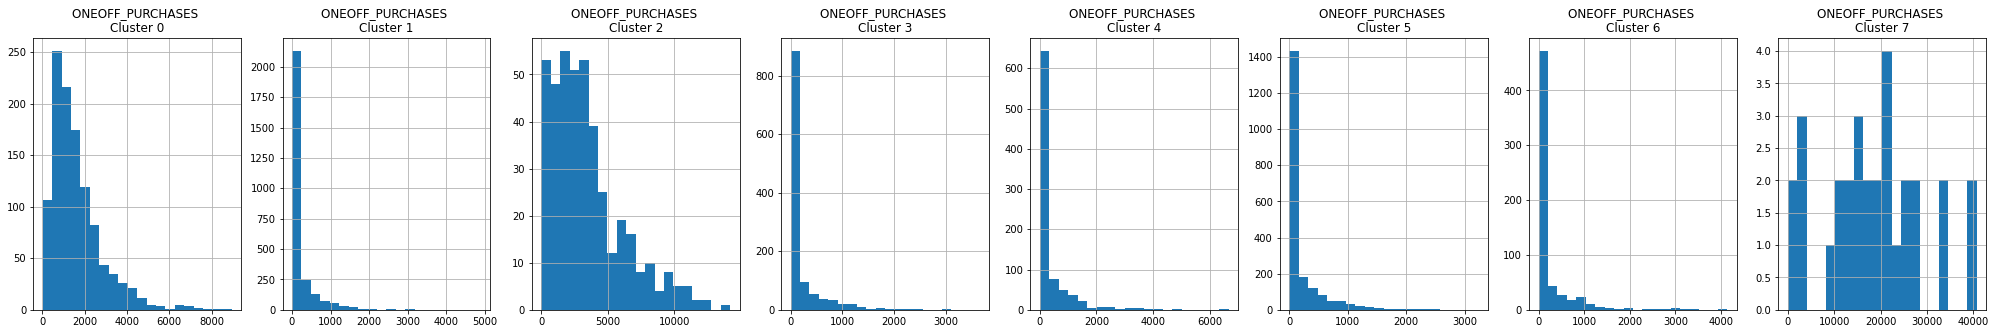

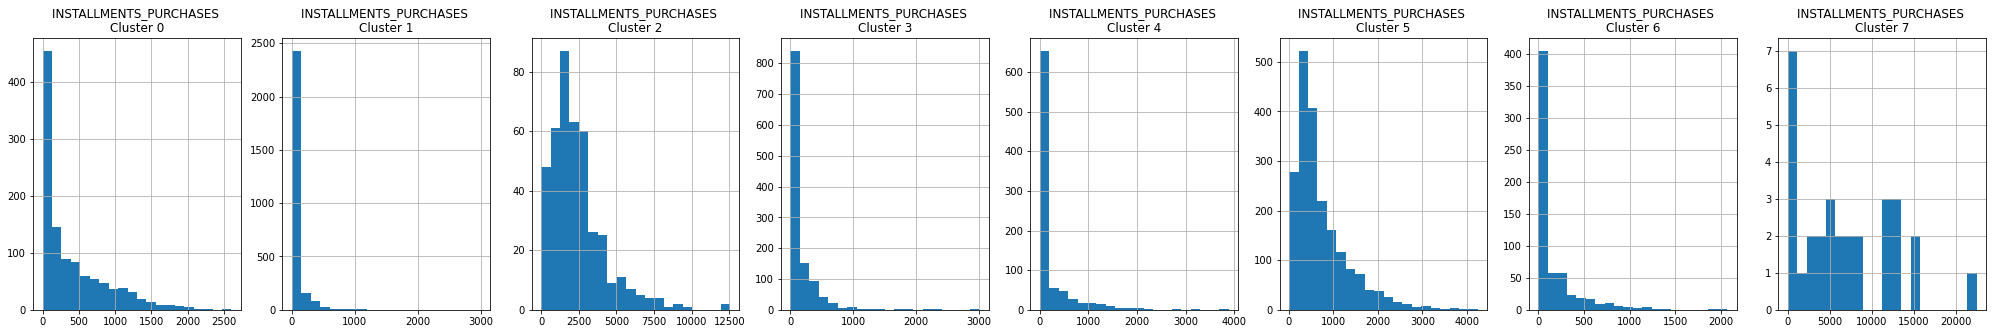

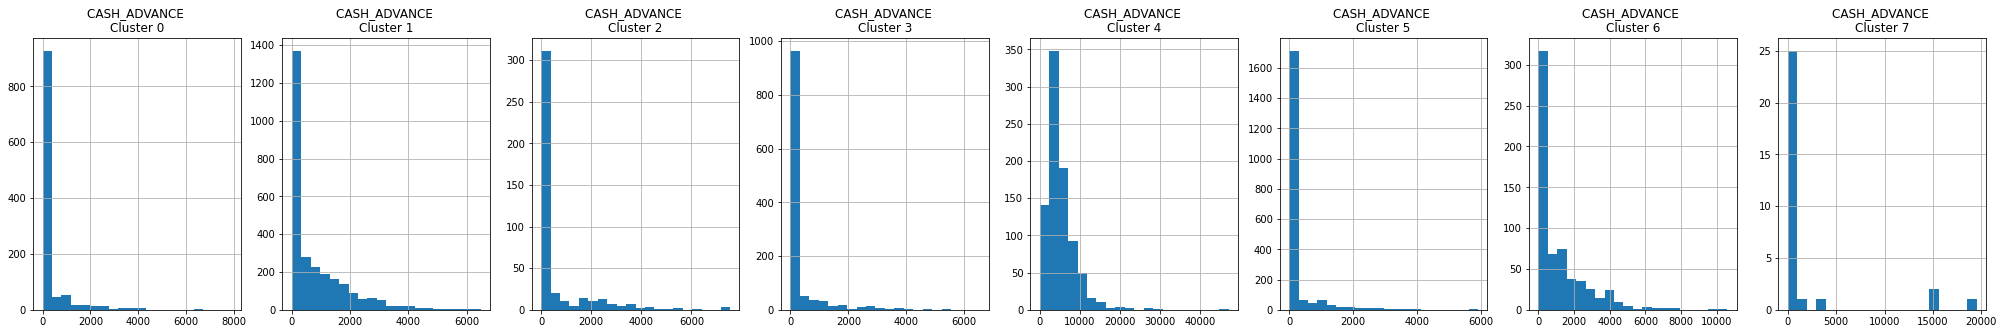

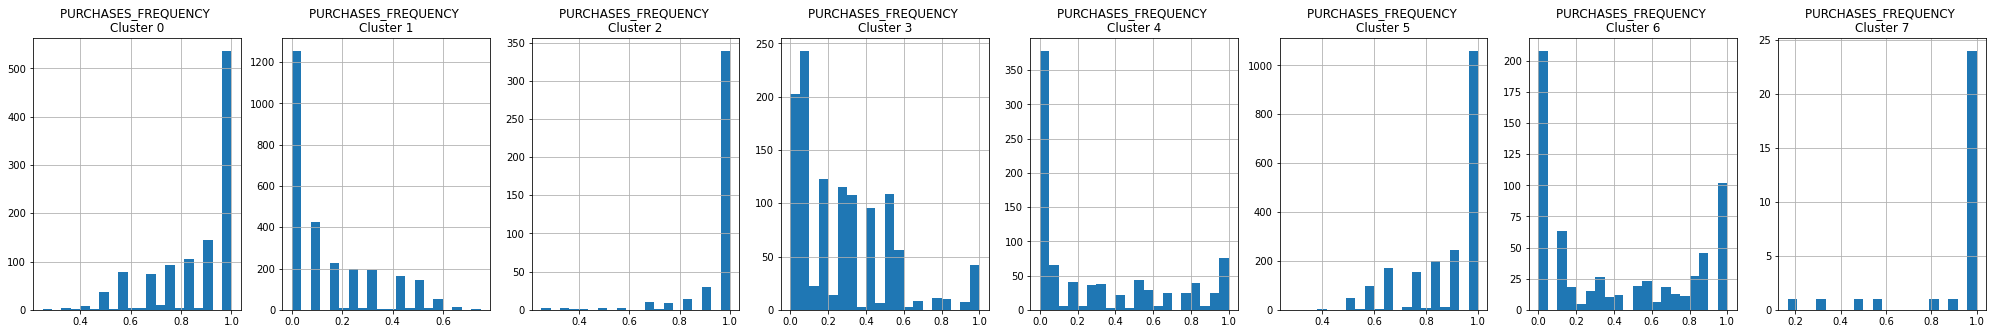

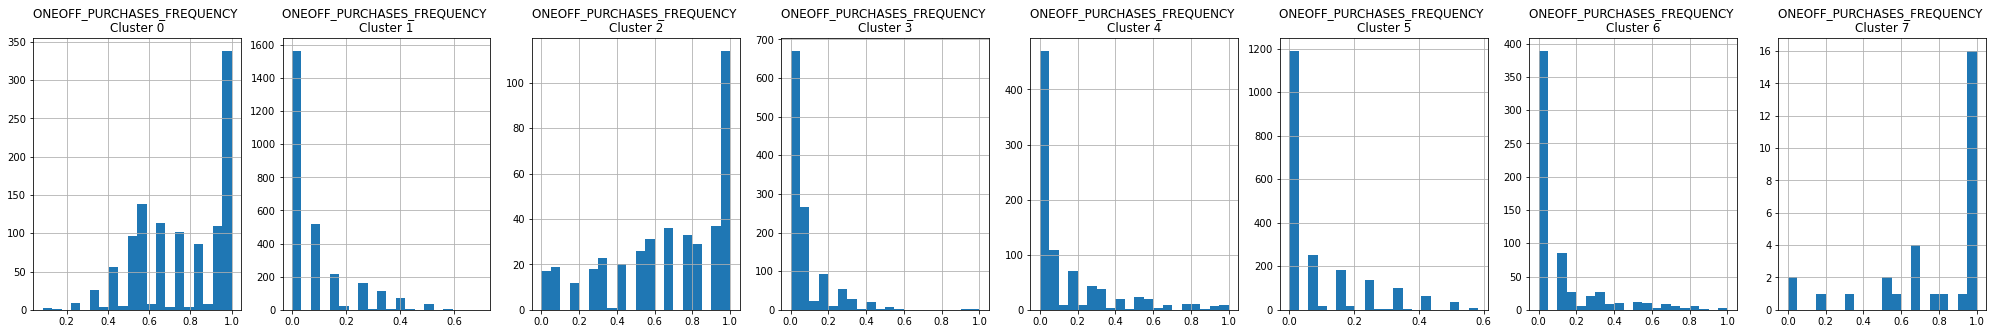

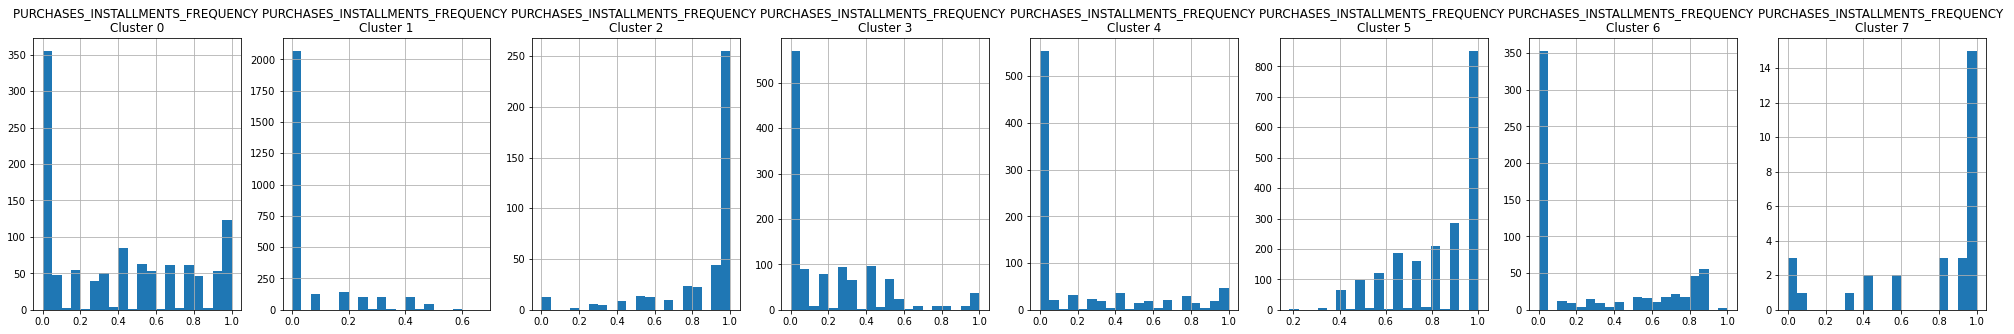

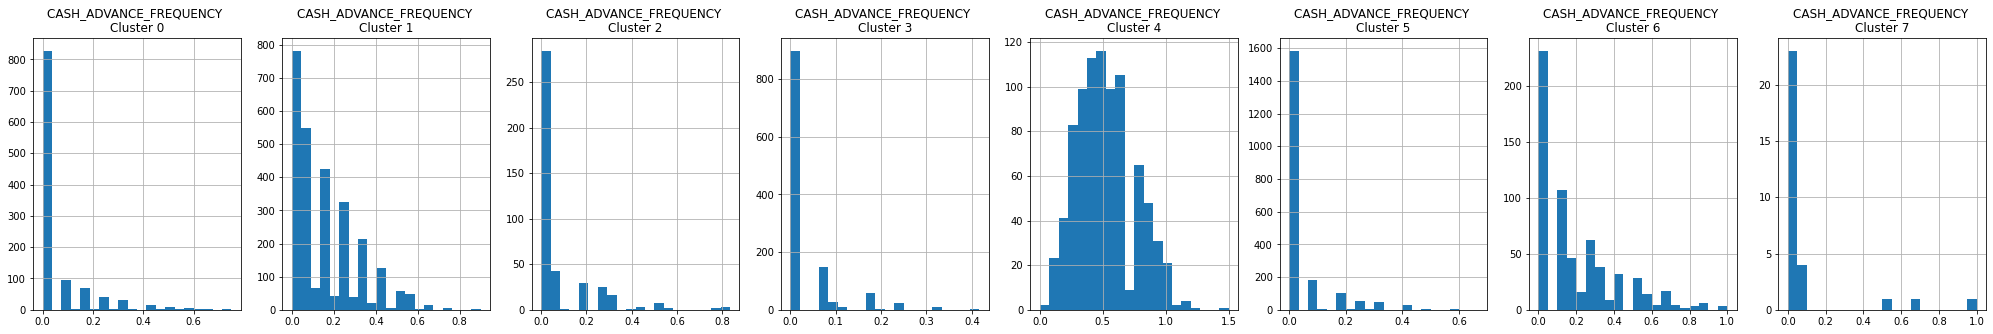

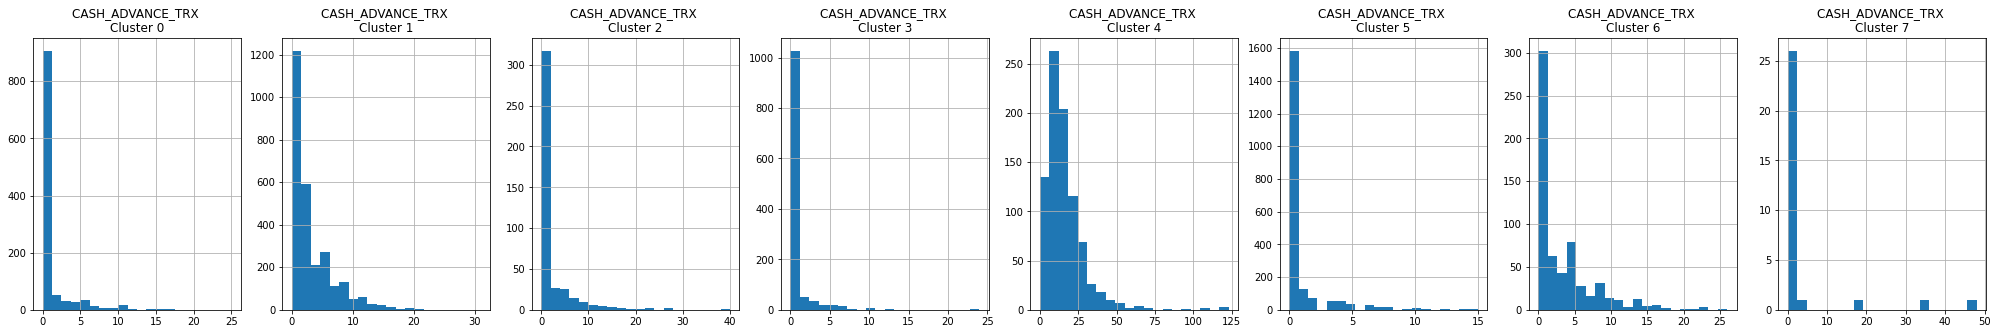

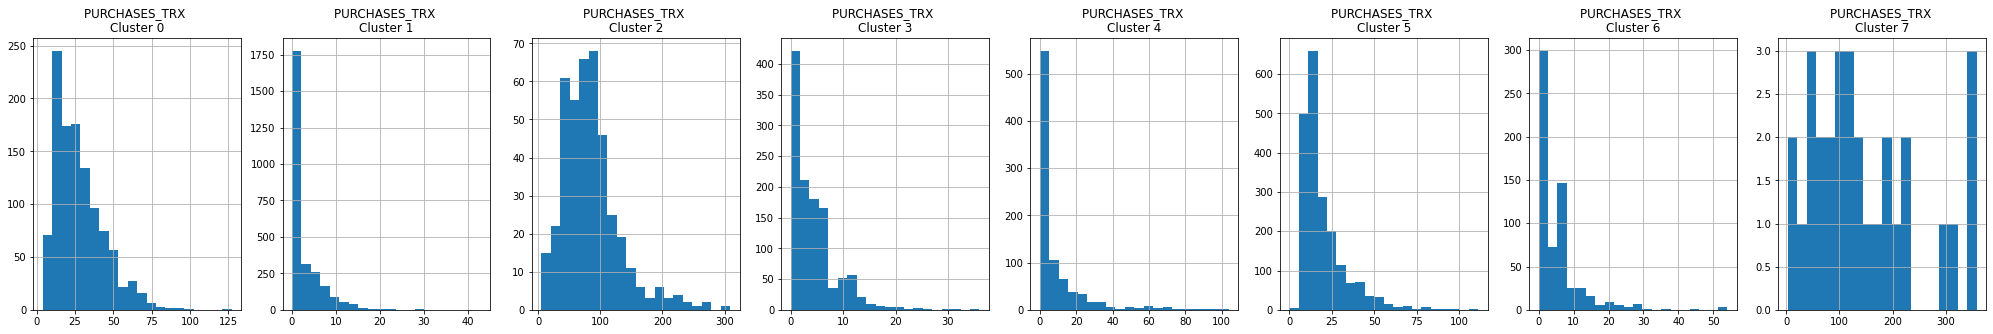

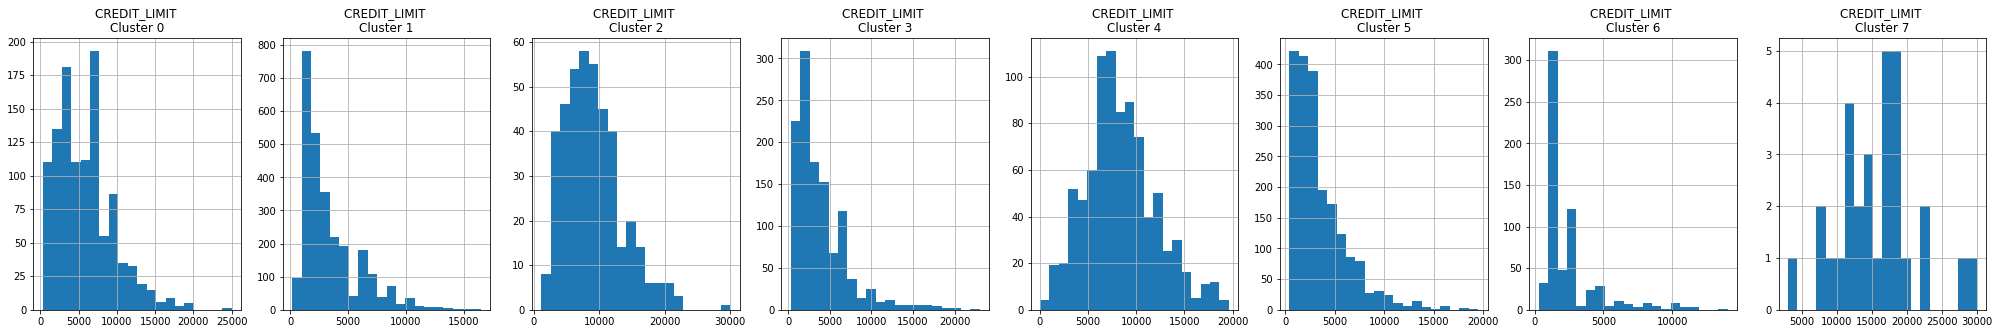

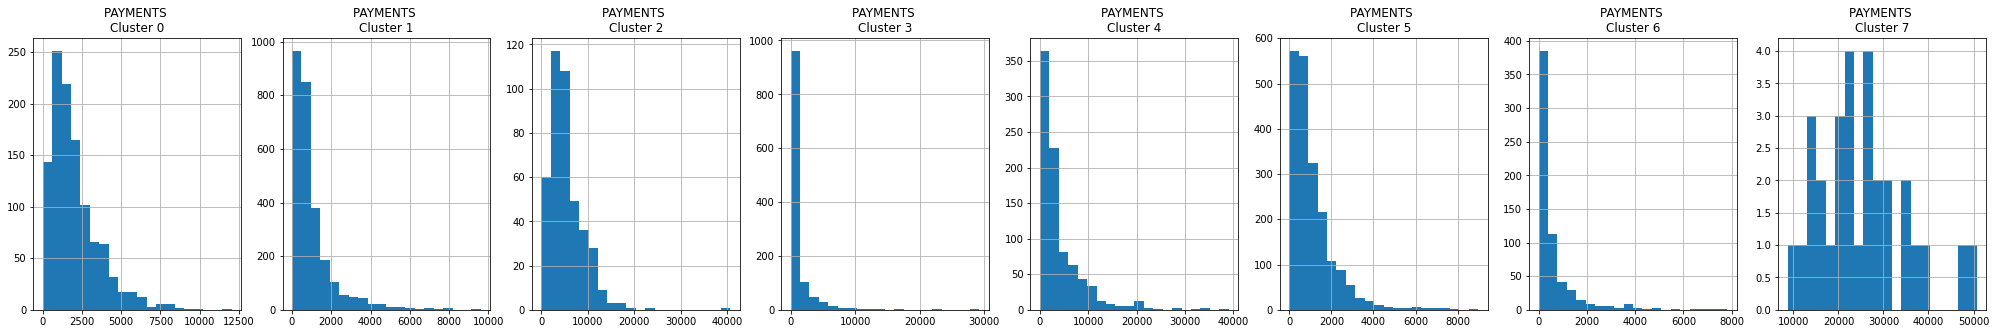

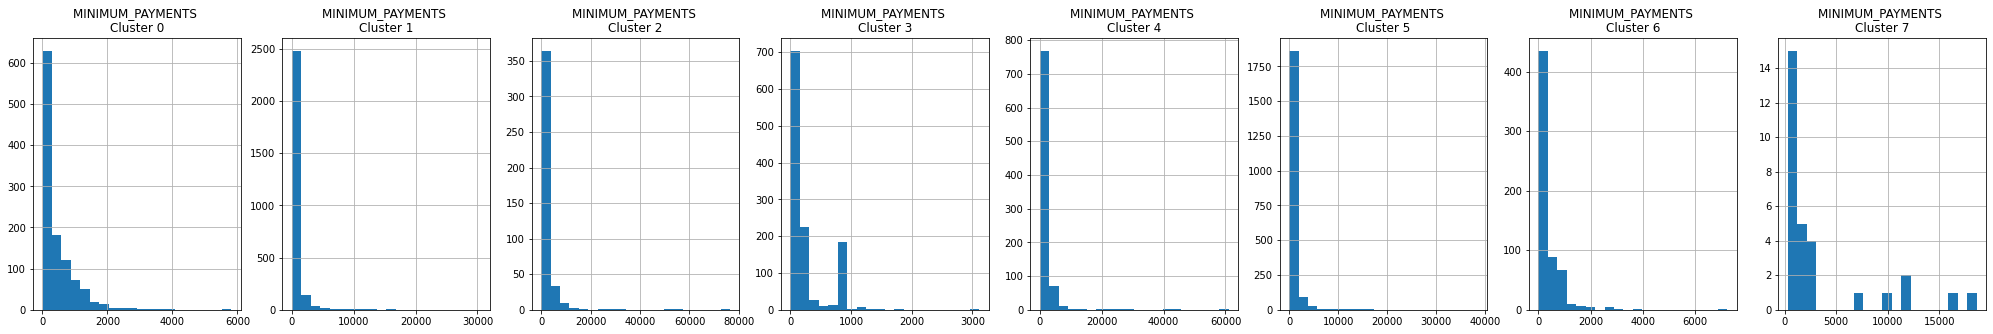

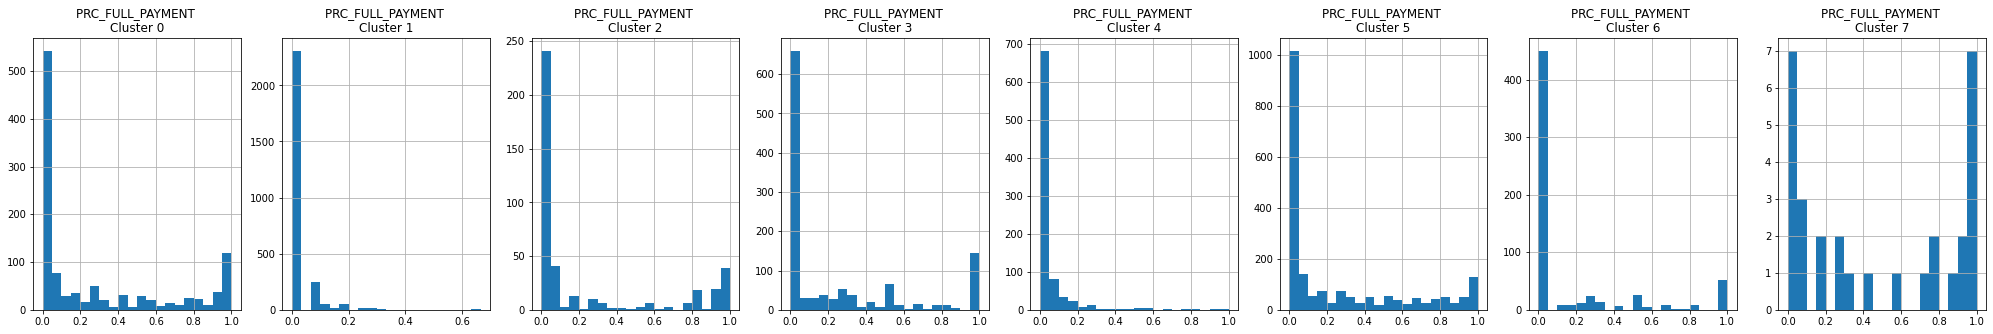

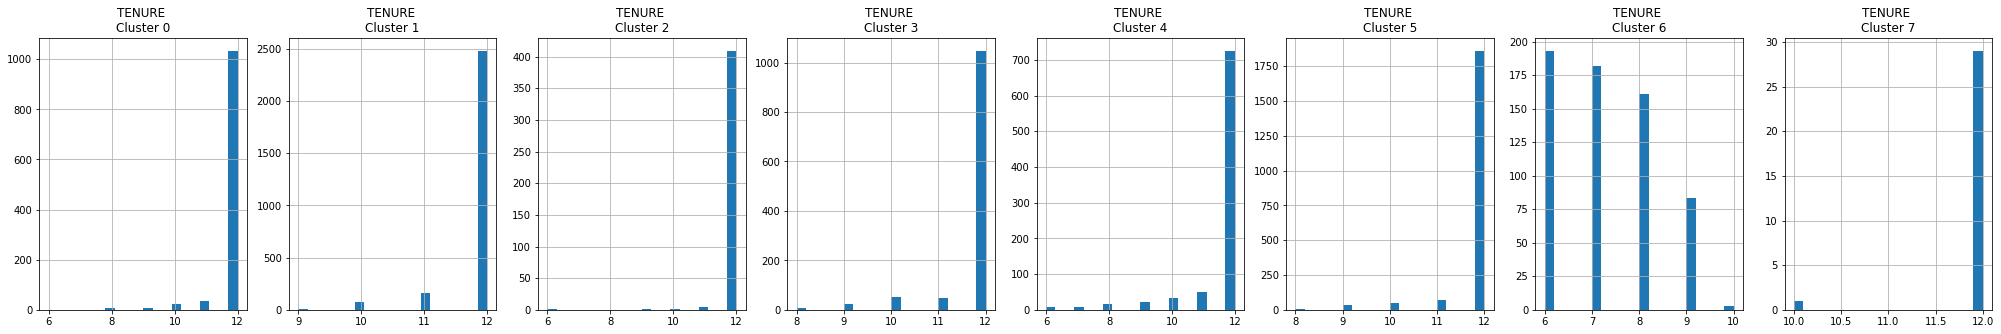

In [196]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [198]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'CLUSTER')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1471,262.106758,1.000000,2625.84,2625.84,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,38,4500.0,2489.949174,167.452035,1.0,12,0
1081,413.987831,1.000000,985.79,892.80,92.99,0.000000,0.500000,0.500000,0.250000,0.000000,0,16,3000.0,887.885624,176.216309,0.0,12,0
1079,3892.223260,1.000000,929.99,453.00,476.99,558.732109,1.000000,0.500000,1.000000,0.083333,1,65,6500.0,951.737085,909.741196,0.0,12,0
4248,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,0.333333,0.166667,2,16,4000.0,549.682725,254.640736,0.0,12,0
6287,43.656303,0.909091,2122.98,1826.67,296.31,0.000000,0.833333,0.666667,0.166667,0.000000,0,17,10500.0,2006.417008,131.553346,1.0,12,0


In [199]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
645,1482.235539,1.0,14604.87,2475.93,12128.94,0.00000,1.000000,0.583333,1.000000,0.0,0,219,15500.0,14462.63056,340.717801,1.000000,12,7
854,4419.302940,1.0,12551.95,10901.24,1650.71,14896.54051,1.000000,0.666667,1.000000,0.5,19,122,17000.0,31698.41902,1448.585054,0.416667,12,7
4282,2004.816462,1.0,20747.34,13007.07,7740.27,0.00000,1.000000,1.000000,1.000000,0.0,0,95,10000.0,17005.40969,410.800069,1.000000,12,7
2970,5968.583246,1.0,22381.97,19150.02,3231.95,0.00000,1.000000,1.000000,0.583333,0.0,0,87,14500.0,20343.28681,1966.191831,0.000000,12,7
501,13479.288210,1.0,41050.40,40624.06,426.34,0.00000,0.833333,0.666667,0.416667,0.0,0,157,17000.0,36066.75068,15914.484620,0.083333,12,7


## Create csv file for definition with the marketing department

In [200]:
credit_ordered.to_csv('cluster.csv')

### Read cluster.csv file

In [203]:
pd.read_csv('cluster.csv')

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,1471,262.106758,1.000000,2625.84,2625.84,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,38,4500.0,2489.949174,167.452035,1.000000,12,0
1,1081,413.987831,1.000000,985.79,892.80,92.99,0.000000,0.500000,0.500000,0.250000,0.000000,0,16,3000.0,887.885624,176.216309,0.000000,12,0
2,1079,3892.223260,1.000000,929.99,453.00,476.99,558.732109,1.000000,0.500000,1.000000,0.083333,1,65,6500.0,951.737085,909.741196,0.000000,12,0
3,4248,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,0.333333,0.166667,2,16,4000.0,549.682725,254.640736,0.000000,12,0
4,6287,43.656303,0.909091,2122.98,1826.67,296.31,0.000000,0.833333,0.666667,0.166667,0.000000,0,17,10500.0,2006.417008,131.553346,1.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,645,1482.235539,1.000000,14604.87,2475.93,12128.94,0.000000,1.000000,0.583333,1.000000,0.000000,0,219,15500.0,14462.630560,340.717801,1.000000,12,7
8946,854,4419.302940,1.000000,12551.95,10901.24,1650.71,14896.540510,1.000000,0.666667,1.000000,0.500000,19,122,17000.0,31698.419020,1448.585054,0.416667,12,7
8947,4282,2004.816462,1.000000,20747.34,13007.07,7740.27,0.000000,1.000000,1.000000,1.000000,0.000000,0,95,10000.0,17005.409690,410.800069,1.000000,12,7
8948,2970,5968.583246,1.000000,22381.97,19150.02,3231.95,0.000000,1.000000,1.000000,0.583333,0.000000,0,87,14500.0,20343.286810,1966.191831,0.000000,12,7
